## LOGISTIC REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the csv files using pandas
df_train=pd.read_csv('Titanic_train.csv')
df_test=pd.read_csv('Titanic_test.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


EDA steps
1. Identify missing values
2. Remove duplicates
3. Remove outliers

## EDA ON TRAINING DATASET

In [5]:
## identify null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Find the mean to replace the missing values in the column Age
mean=df_train['Age'].mean()
mean

29.69911764705882

In [7]:
# Fill null values with the mean of age
df_train.fillna({'Age':mean},inplace=True)

In [8]:
# Remove columns Name (Not useful for training) & Cabin (Many null values)
df_train.drop(columns=(['Cabin','Name','PassengerId','Ticket','Fare']),inplace=True)

In [9]:
# Drop the rest of the rows with null values
df_train.dropna(inplace=True)

In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


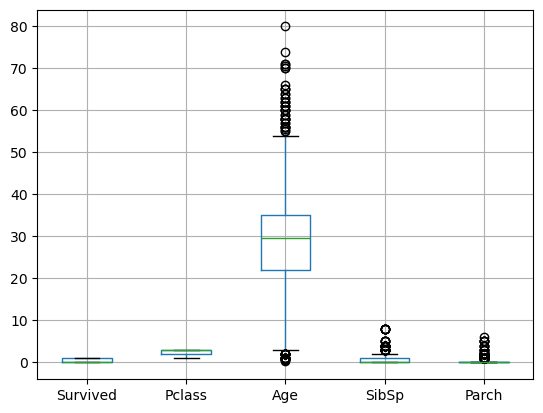

In [11]:
## Identify outliers
## As we can see there is no outliers
df_train.boxplot()
plt.show()

In [12]:
## Find inter quantile range to remove outliers
Q1=df_train['Age'].quantile(.2)
Q3=df_train['Age'].quantile(.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

22.0 35.0 13.0


In [13]:
lower_extreme=Q1-1.5*IQR
upper_extreme=Q3+1.5*IQR
print(lower_extreme,upper_extreme)

2.5 54.5


In [14]:
df_new=df_train[(df_train['Age']<lower_extreme) | (df_train['Age']>upper_extreme)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
7,0,3,male,2.00,3,1,S
11,1,1,female,58.00,0,0,S
15,1,2,female,55.00,0,0,S
16,0,3,male,2.00,4,1,Q
33,0,2,male,66.00,0,0,S
...,...,...,...,...,...,...,...
824,0,3,male,2.00,4,1,S
827,1,2,male,1.00,0,2,C
831,1,2,male,0.83,1,1,S
851,0,3,male,74.00,0,0,S


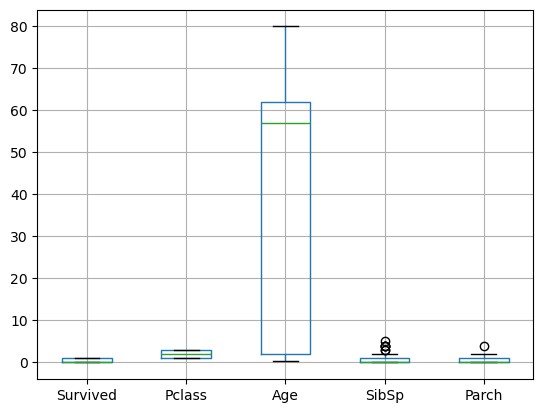

In [66]:
## Outliers are removed
df_new.boxplot()
plt.show()

## EDA ON TEST DATASET

In [16]:
## identify null values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# Find the mean to replace the missing values in the column Age
mean=df_test['Age'].mean()
mean

30.272590361445783

In [18]:
# Fill null values with the mean of age
df_test.fillna({'Age':mean},inplace=True)

In [19]:
# Remove columns Name (Not useful for training) & Cabin (Many null values)
df_test.drop(columns=(['Cabin','Name','PassengerId','Ticket','Fare']),inplace=True)

In [20]:
# Drop the rest of the rows with null values
df_test.dropna(inplace=True)

In [21]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.50000,0,0,Q
1,3,female,47.00000,1,0,S
2,2,male,62.00000,0,0,Q
3,3,male,27.00000,0,0,S
4,3,female,22.00000,1,1,S
...,...,...,...,...,...,...
413,3,male,30.27259,0,0,S
414,1,female,39.00000,0,0,C
415,3,male,38.50000,0,0,S
416,3,male,30.27259,0,0,S


In [22]:
## Encode categorical variables using onehot encoder
## Sex and Embarkment are categorical variables
## So to perform Logistic regression we have to encode them to numerical variables

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
oneH=OneHotEncoder()

In [25]:
df1=pd.DataFrame(oneH.fit_transform(df_train[['Sex','Embarked']]).toarray())

In [26]:
df1

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0
885,1.0,0.0,0.0,0.0,1.0
886,1.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0


In [27]:
df_train=df_train.join(df1)

In [28]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,0,1,2,3,4
0,0,3,male,22.000000,1,0,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.000000,1,0,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.000000,1,0,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.000000,0,0,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
887,1,1,female,19.000000,0,0,S,0.0,1.0,1.0,0.0,0.0
888,0,3,female,29.699118,1,2,S,0.0,1.0,0.0,1.0,0.0
889,1,1,male,26.000000,0,0,C,NaN,NaN,NaN,NaN,NaN


In [29]:
df_train.dropna(inplace=True)

In [30]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,0,1,2,3,4
0,0,3,male,22.000000,1,0,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.000000,1,0,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.000000,1,0,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.000000,0,0,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,S,0.0,1.0,0.0,0.0,1.0
885,0,3,female,39.000000,0,5,Q,1.0,0.0,0.0,0.0,1.0
886,0,2,male,27.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
887,1,1,female,19.000000,0,0,S,0.0,1.0,1.0,0.0,0.0


In [31]:
df_train.drop((['Sex','Embarked']),axis=1,inplace=True)

In [32]:
df_train=df_train.rename(columns={0:'Female',1:'Male',2:'Embarked_C',3:'Embarked_S',4:'Embarked_Q'})

In [33]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Female,Male,Embarked_C,Embarked_S,Embarked_Q
0,0,3,22.0,1,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,0.0,1.0,0.0,0.0,1.0


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model=LogisticRegression()

In [36]:
# split data to target and feature
target=df_train[['Survived']]
feature=df_train.drop(columns='Survived')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,train_size=.75,random_state=100)

In [39]:
log_model.fit(xtrain,ytrain)

C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
ypred=log_model.predict(xtest)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(ytest,ypred)

0.6801801801801802

In [43]:
## Perform same steps on test dataset as we done on train dataset to encode Sex and Embarked columns to numerical.
df1=pd.DataFrame(oneH.fit_transform(df_test[['Sex','Embarked']]).toarray())

In [44]:
df_test=df_test.join(df1)

In [45]:
df_test.dropna(inplace=True)

In [46]:
df_test.drop((['Sex','Embarked']),axis=1,inplace=True)

In [47]:
df_test=df_test.rename(columns={0:'Female',1:'Male',2:'Embarked_C',3:'Embarked_S',4:'Embarked_Q'})

In [48]:
df_test

,Pclass,Age,SibSp,Parch,Female,Male,Embarked_C,Embarked_S,Embarked_Q
0,3,34.50000,0,0,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,0.0,1.0,0.0,0.0,1.0
414,1,39.00000,0,0,1.0,0.0,1.0,0.0,0.0
415,3,38.50000,0,0,0.0,1.0,0.0,0.0,1.0
416,3,30.27259,0,0,0.0,1.0,0.0,0.0,1.0


## Confusion Matrix
#### Precision = TP/(TP+FP) -> Total TP out of total positives identified.
#### Recall(TP rate) = TP/(TP+FN) -> Total number of TP out of all actual positives.
#### FP rate = FP/(FP+TN) -> Total number of FP out of all the actual negatives.
#### F1 score = 2 x (precision x recall)/(precision + recall) -> Combination of both precision and recall.

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [50]:
conf=confusion_matrix(ytest,ypred)
conf

array([[121,  20],
       [ 51,  30]], dtype=int64)

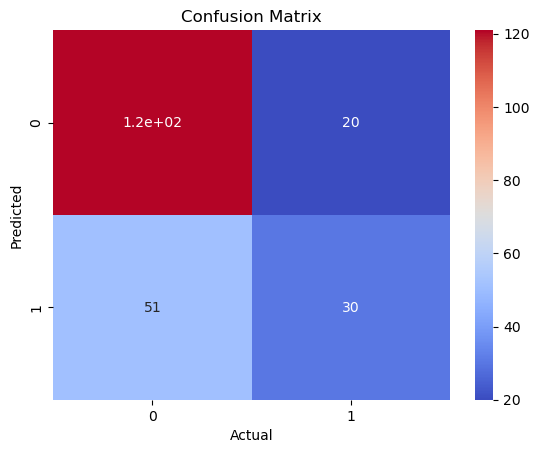

In [51]:
sns.heatmap(conf,annot=True,cmap='coolwarm')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
ytest.value_counts()

Survived
0           141
1            81
Name: count, dtype: int64

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       141
           1       0.60      0.37      0.46        81

    accuracy                           0.68       222
   macro avg       0.65      0.61      0.62       222
weighted avg       0.67      0.68      0.66       222



In [54]:
from sklearn.metrics import roc_auc_score, roc_curve

In [55]:
log_proba=log_model.predict_proba(xtest)[:,1]

In [56]:
auc_score=roc_auc_score(ytest,log_proba)
auc_score

0.6964801681113738

In [57]:
roc_curve(ytest,log_proba)

(array([0.        , 0.        , 0.        , 0.02836879, 0.02836879,
        0.03546099, 0.03546099, 0.04964539, 0.04964539, 0.05673759,
        0.05673759, 0.06382979, 0.06382979, 0.07092199, 0.07092199,
        0.08510638, 0.09929078, 0.10638298, 0.10638298, 0.11347518,
        0.11347518, 0.14184397, 0.14184397, 0.15602837, 0.15602837,
        0.17730496, 0.17730496, 0.18439716, 0.18439716, 0.23404255,
        0.23404255, 0.24113475, 0.24113475, 0.24822695, 0.24822695,
        0.26950355, 0.27659574, 0.27659574, 0.28368794, 0.28368794,
        0.29078014, 0.29078014, 0.31914894, 0.31914894, 0.32624113,
        0.33333333, 0.34042553, 0.34042553, 0.36170213, 0.36170213,
        0.38297872, 0.38297872, 0.41843972, 0.41843972, 0.43262411,
        0.43971631, 0.44680851, 0.44680851, 0.45390071, 0.46808511,
        0.46808511, 0.5035461 , 0.5177305 , 0.5248227 , 0.53191489,
        0.53900709, 0.53900709, 0.54609929, 0.54609929, 0.56737589,
        0.60283688, 0.63120567, 0.63829787, 0.65

In [58]:
fpr,tpr,thr=roc_curve(ytest,log_proba)

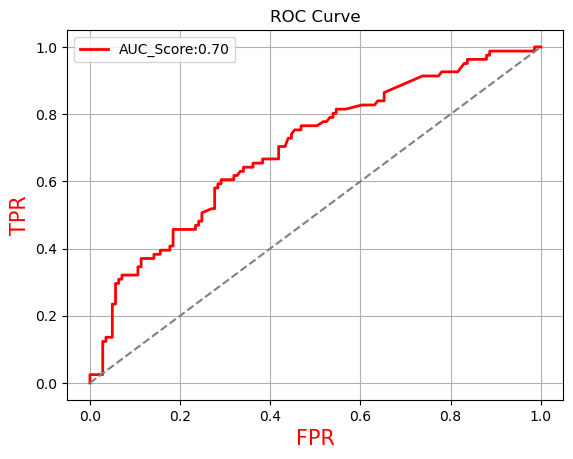

In [59]:
plt.plot(fpr,tpr,lw=2,color='red',label=f'AUC_Score:{auc_score:.2f}')
plt.legend(loc='best')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC Curve')
plt.xlabel('FPR',color='red',size=15)
plt.ylabel('TPR',color='red',size=15)
plt.grid()
plt.show()

In [60]:
ypred=log_model.predict(feature)

In [61]:
accuracy_score(ypred,target)

0.6978579481397971

In [62]:
file='logm_pkl'

In [63]:
import pickle

In [64]:
## Write this model to a pickle file
pickle.dump(log_model,open(file,'wb'))

In [65]:
## Convert test dataframe to a csv file after EDA and encoding
df_test.to_csv('df_test.csv', index=False)
